# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np 
# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
data = pd.read_csv(url, sep=",")
#datos =pd.set_option('display.max_colums',None)

# Mostrar las primeras filas del DataFrame
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [2]:
data.shape

(3140, 108)

In [3]:
data.columns.tolist()

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [4]:
data.isna().sum().sum()

np.int64(0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
duplicados = data[data.duplicated()]
data = data.drop_duplicates().reset_index(drop = True)

print(duplicados)

Empty DataFrame
Columns: [fips, TOT_POP, 0-9, 0-9 y/o % of total pop, 19-Oct, 10-19 y/o % of total pop, 20-29, 20-29 y/o % of total pop, 30-39, 30-39 y/o % of total pop, 40-49, 40-49 y/o % of total pop, 50-59, 50-59 y/o % of total pop, 60-69, 60-69 y/o % of total pop, 70-79, 70-79 y/o % of total pop, 80+, 80+ y/o % of total pop, White-alone pop, % White-alone, Black-alone pop, % Black-alone, Native American/American Indian-alone pop, % NA/AI-alone, Asian-alone pop, % Asian-alone, Hawaiian/Pacific Islander-alone pop, % Hawaiian/PI-alone, Two or more races pop, % Two or more races, POP_ESTIMATE_2018, N_POP_CHG_2018, GQ_ESTIMATES_2018, R_birth_2018, R_death_2018, R_NATURAL_INC_2018, R_INTERNATIONAL_MIG_2018, R_DOMESTIC_MIG_2018, R_NET_MIG_2018, Less than a high school diploma 2014-18, High school diploma only 2014-18, Some college or associate's degree 2014-18, Bachelor's degree or higher 2014-18, Percent of adults with less than a high school diploma 2014-18, Percent of adults with a hig

In [7]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [8]:
# Factorizar columnas categoricas

def automatizar_factorizacion(df, columnas):
    transformacion_reglas = {}
    col_factorizadas = []
    
    # Iterar sobre las columnas especificadas para la factorización
    for col in columnas:
        # Aplicar la factorización y reemplazar la columna original con la columna factorizada
        df[f"{col}_n"] = pd.factorize(df[col])[0]
        
        # Guardar las reglas de transformación para la columna actual en el diccionario
        transformacion_reglas[col] = {row[col]: row[f"{col}_n"] for _, row in df[[col, f"{col}_n"]].drop_duplicates().iterrows()}
        
        # Reemplazar la columna original por la columna factorizada
        df[col] = df[f"{col}_n"]
        
        # Agregar el nombre de la columna factorizada a la lista
        col_factorizadas.append(col)  # Ya no agregamos `f"{col}_n"` ya que reemplazamos la columna original

        # Eliminar la columna auxiliar que contiene los números factorized (ya que la hemos reemplazado)
        df.drop(columns=[f"{col}_n"], inplace=True)
    
    # Guardar el diccionario de reglas en un archivo JSON
    with open("../models/transformacion_reglas_categoricas.json", "w") as f:
        json.dump(transformacion_reglas, f)
    
    print("Factorización completada y reglas guardadas en 'transformacion_reglas_categoricas.json'.")
    
    # Retornar el DataFrame actualizado con las columnas reemplazadas y la lista de columnas factorizadas
    return df, col_factorizadas

# Llamar a la función para automatizar la factorización
data, col_factorizadas = automatizar_factorizacion(data, cat_cols) ### VARIABLES A FACTRIZAR 

# Imprimir las columnas que han sido factorizadas
print("Columnas factorizadas:", col_factorizadas)

Factorización completada y reglas guardadas en 'transformacion_reglas_categoricas.json'.
Columnas factorizadas: ['COUNTY_NAME', 'STATE_NAME']


In [9]:
columns_to_drop = []

for column in data.columns:
    if ('%' in column or 'Percent' in column or 'rate' in column or column.startswith('PCT')):
        columns_to_drop.append(column)

data.drop(columns=columns_to_drop, inplace=True)

print("Columnas eliminadas:", columns_to_drop)
print(data.shape)
data

Columnas eliminadas: ['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Percent of Population Aged 60+', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_Lower 95% CI', 'COP

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,6326,5359,6577,5334,5261,4943,2198,...,10672,5.9,1862,6.6,2098,8.9,2834,2.6,821,5
3136,56039,23081,2384,2185,2967,4093,3423,2928,2875,1569,...,3655,5.2,981,4.9,928,7.2,1360,2.4,447,5
3137,56041,20299,3121,3205,2153,2702,2390,2434,2554,1233,...,4944,7.2,1034,8.0,1163,10.4,1500,3.0,430,5
3138,56043,7885,858,1113,715,903,900,1085,1118,741,...,1730,8.2,500,8.3,506,11.3,686,3.4,207,6


In [10]:
data

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,6326,5359,6577,5334,5261,4943,2198,...,10672,5.9,1862,6.6,2098,8.9,2834,2.6,821,5
3136,56039,23081,2384,2185,2967,4093,3423,2928,2875,1569,...,3655,5.2,981,4.9,928,7.2,1360,2.4,447,5
3137,56041,20299,3121,3205,2153,2702,2390,2434,2554,1233,...,4944,7.2,1034,8.0,1163,10.4,1500,3.0,430,5
3138,56043,7885,858,1113,715,903,900,1085,1118,741,...,1730,8.2,500,8.3,506,11.3,686,3.4,207,6


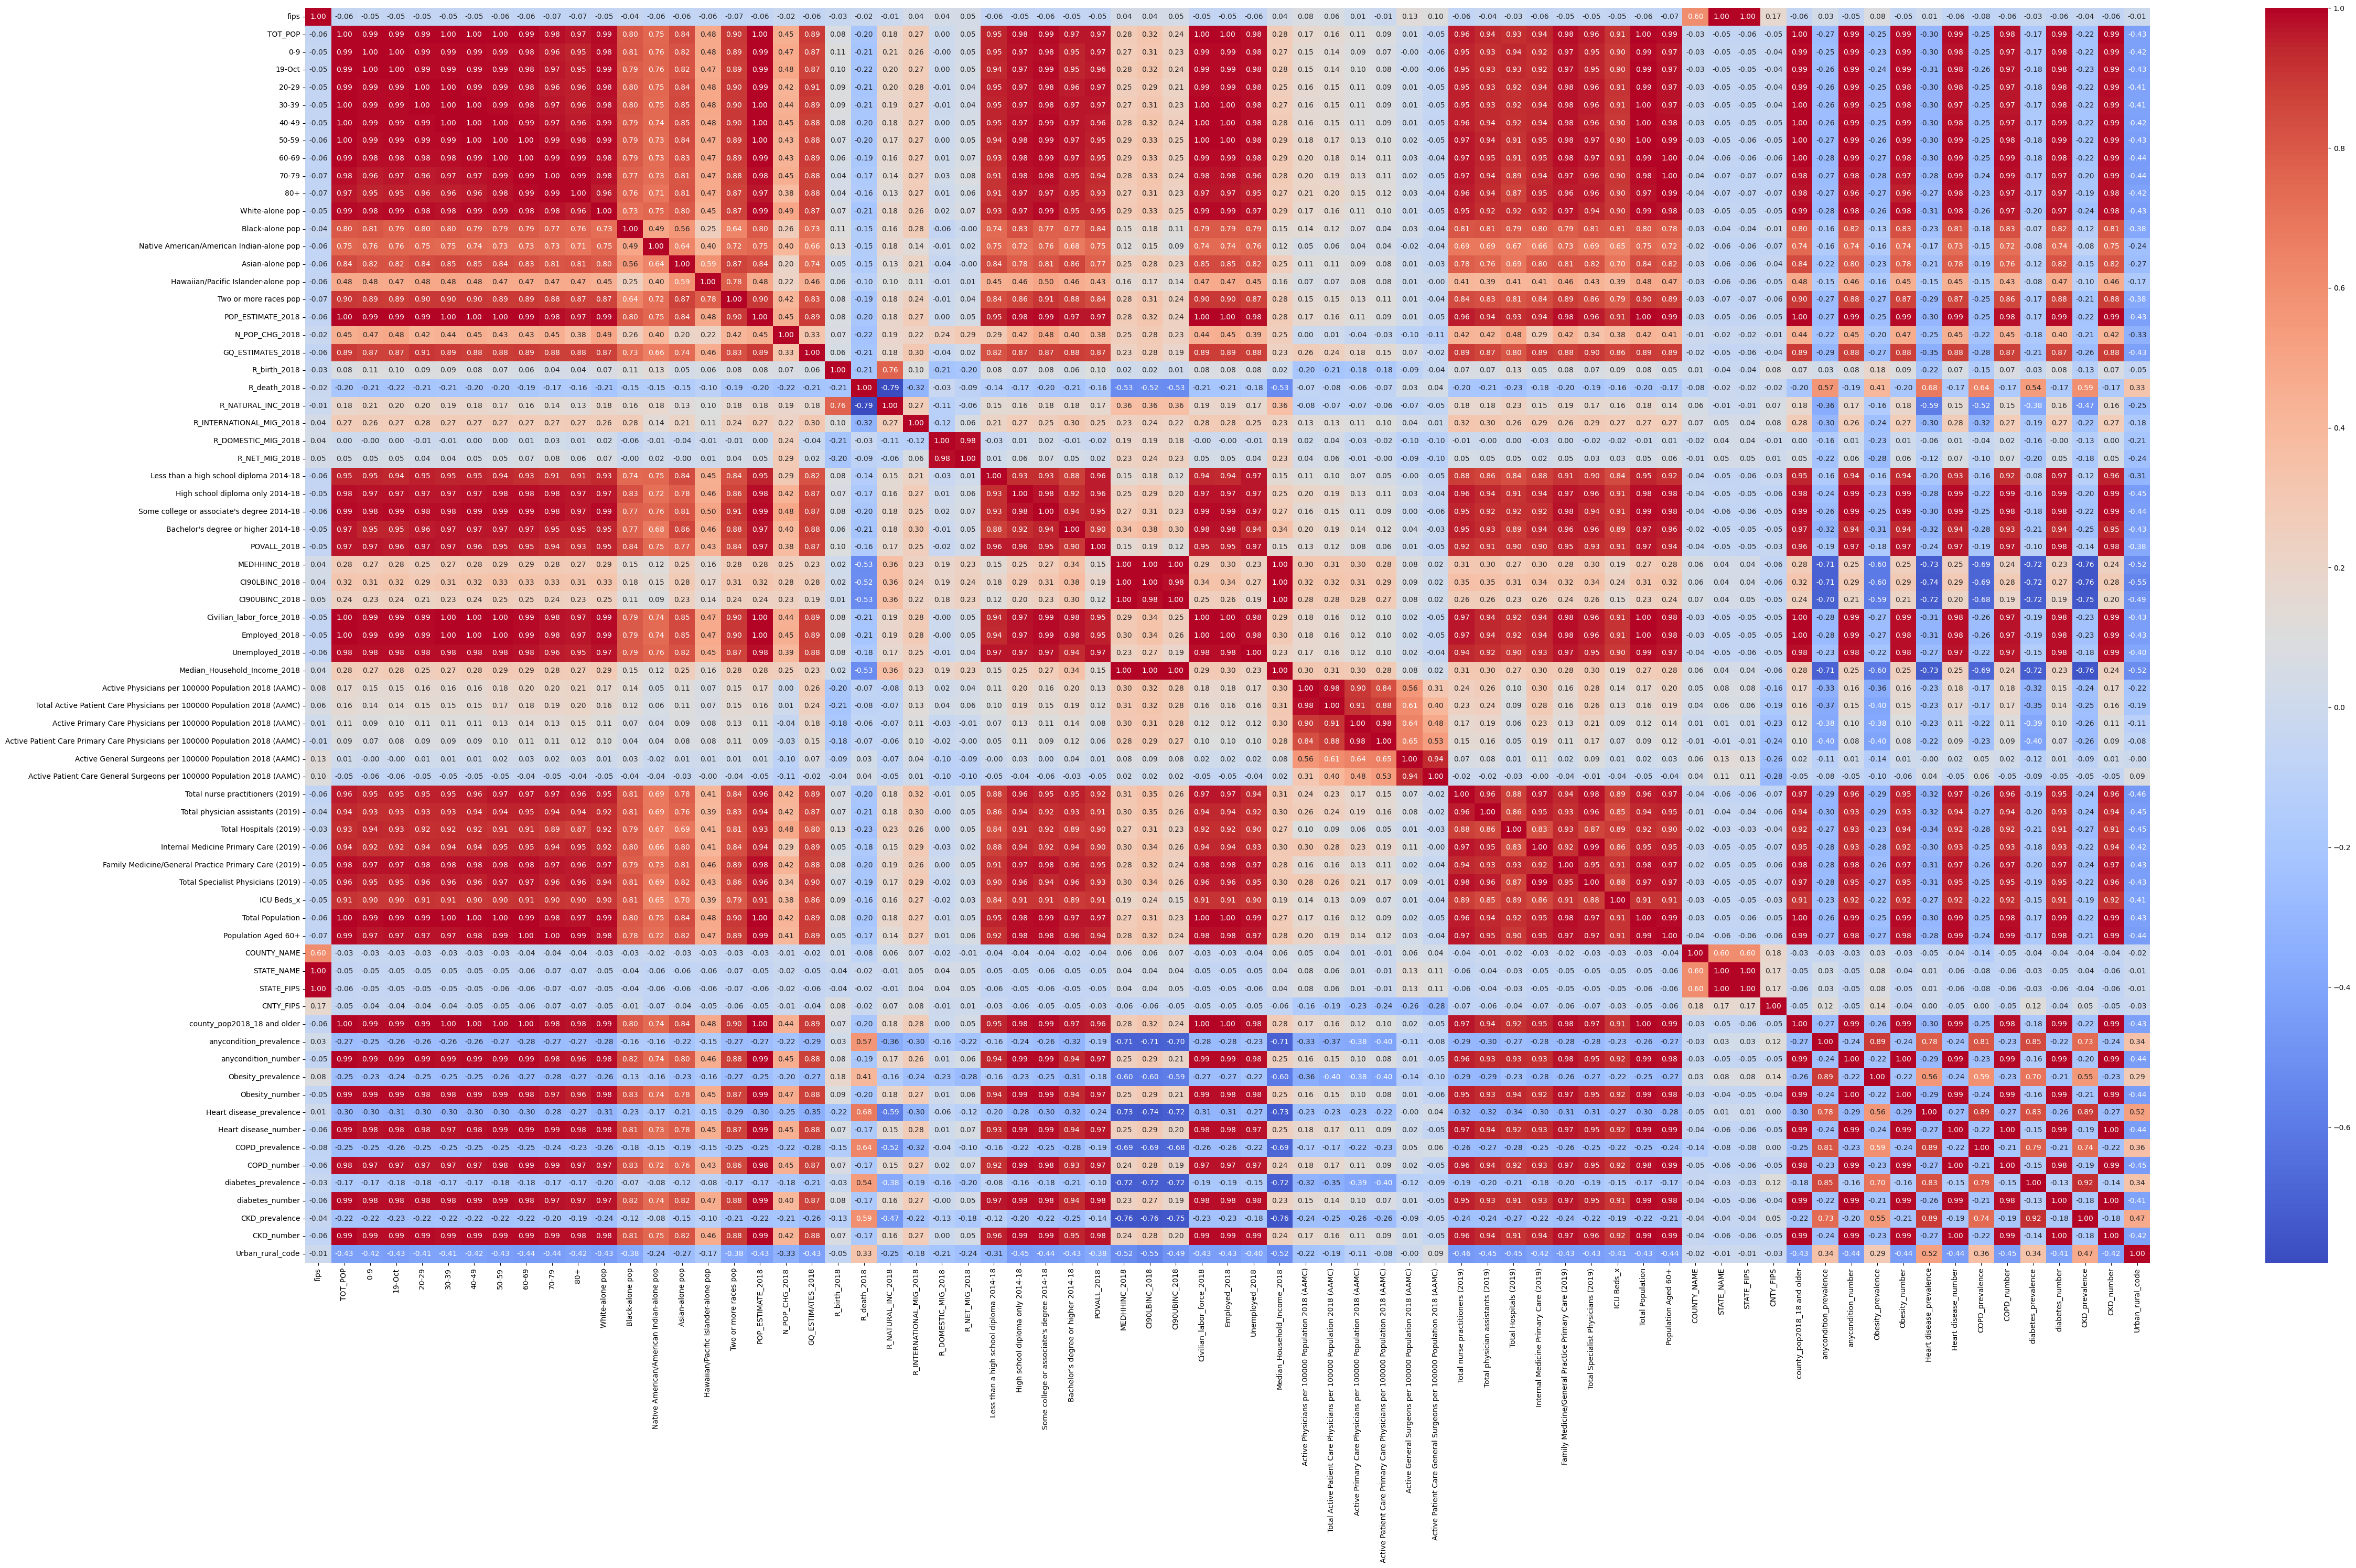

In [11]:
#columns_to_exclude = data.columns[2:10].tolist()  # Especifica las columnas a excluir
#data_filtered = data.drop(columns=cat_cols)
fig, axis = plt.subplots(figsize=(50, 30))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

In [12]:
target = ['anycondition_number']

In [13]:
# Columnas con outlaiers
columns_with_outliers = []
# Iterar sobre las columnas numéricas del DataFrame
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    # Calcular los cuartiles y el IQR para cada columna
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    # Calcular los límites inferiores y superiores para detectar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Detectar los outliers (valores fuera de los límites)
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]
    # Si hay outliers, agregar el nombre de la columna a la lista
    if not outliers.empty:
        columns_with_outliers.append(column)
# Mostrar las columnas que contienen outliers
print("Columnas con outliers:", columns_with_outliers)

Columnas con outliers: ['TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Pati

In [14]:
data_sin_outliers = data.copy()
col_con_outliers = columns_with_outliers
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]
outliers_dict = {}
for column in col_con_outliers:
  data_sin_outliers, limits_list = replace_outliers_from_column(column, data_sin_outliers)
  outliers_dict[column] = limits_list
with open("../models/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict, f)
outliers_dict

{'TOT_POP': [88, np.float64(153337.625)],
 '0-9': [0, np.float64(18321.75)],
 '19-Oct': [0, np.float64(19993.875)],
 '20-29': [0, np.float64(20545.0)],
 '30-39': [11, np.float64(18936.5)],
 '40-49': [4, np.float64(18433.375)],
 '50-59': [14, np.float64(20668.625)],
 '60-69': [20, np.float64(19561.5)],
 '70-79': [6, np.float64(12508.875)],
 '80+': [0, np.float64(6449.875)],
 'White-alone pop': [24, np.float64(133951.25)],
 'Black-alone pop': [0, np.float64(14199.5)],
 'Native American/American Indian-alone pop': [0, np.float64(1555.5)],
 'Asian-alone pop': [0, np.float64(2080.125)],
 'Hawaiian/Pacific Islander-alone pop': [0, np.float64(165.0)],
 'Two or more races pop': [0, np.float64(3472.5)],
 'POP_ESTIMATE_2018': [88, np.float64(153337.625)],
 'N_POP_CHG_2018': [-24009, np.float64(868.25)],
 'GQ_ESTIMATES_2018': [0, np.float64(5349.75)],
 'R_birth_2018': [np.float64(5.649999999999998),
  np.float64(16.450000000000003)],
 'R_death_2018': [np.float64(3.4499999999999993), np.float64(17

In [15]:
from sklearn.model_selection import train_test_split

# Separar características (X) y la variable objetivo (target)
X = data.drop(target, axis=1)  # Aquí 'target' es el nombre de la columna objetivo
y = data[target]
# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
num_variables = data.copy().drop(target, axis= 1).columns.tolist()
# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = data.drop(target, axis = 1)[num_variables]
X_sin_outliers = data_sin_outliers.drop(target, axis = 1)[num_variables]
y = data[target]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)
# GUARDAR LOS DATASETS
X_train_con_outliers.to_csv("../data/processed/X_train_con_outliers.csv", index = False)
X_train_sin_outliers.to_csv("../data/processed/X_train_sin_outliers.csv", index = False)
X_test_con_outliers.to_csv("../data/processed/X_test_con_outliers.csv", index = False)
X_test_sin_outliers.to_csv("../data/processed/X_test_sin_outliers.csv", index = False)
y_train.to_csv("../data/processed/y_train.csv", index = False)
y_test.to_csv("../data/processed/y_test.csv", index = False)

In [16]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_csv("../data/processed/X_train_con_outliers_norm.csv", index = False)
X_test_con_outliers_norm.to_csv("../data/processed/X_test_con_outliers_norm.csv", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_csv("../data/processed/X_train_sin_outliers_norm.csv", index = False)
X_test_sin_outliers_norm.to_csv("../data/processed/X_test_sin_outliers_norm.csv", index = False)

X_train_con_outliers_norm.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
1292,-0.301633,-0.229763,-0.225393,-0.231350,-0.229775,-0.223780,-0.228216,-0.227030,-0.231375,-0.232151,...,-0.230636,0.866051,-0.224232,0.951061,-0.222477,0.244361,-0.215940,0.644725,-0.216950,0.910528
2302,0.761573,-0.161280,-0.179851,-0.181109,-0.188375,-0.176225,-0.163303,-0.139120,-0.112664,-0.124916,...,-0.158219,0.351189,-0.121664,0.350976,-0.117073,0.021661,-0.135257,0.109985,-0.135212,0.249092
761,-0.833037,-0.198764,-0.209983,-0.195009,-0.168470,-0.194740,-0.193726,-0.199360,-0.218215,-0.220562,...,-0.201734,-0.735742,-0.215308,0.050934,-0.194220,-0.312388,-0.188714,-0.959495,-0.204982,-1.735217
2194,0.629287,-0.048115,-0.049041,-0.029705,-0.067671,-0.062335,-0.044847,-0.033104,-0.044844,-0.036279,...,-0.007673,-0.449707,-0.021238,-0.420561,-0.021363,-0.683554,-0.057561,-0.781249,-0.055748,-1.073780
1241,-0.308413,0.070012,0.073864,0.080526,0.038603,0.025430,0.048850,0.079829,0.119807,0.116625,...,0.156960,-0.106466,0.169262,0.222387,0.232009,-0.201038,0.100319,-0.068262,0.108446,-0.412344


In [17]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_csv("../data/processed/X_train_con_outliers_scal.csv", index = False)
X_test_con_outliers_scal.to_csv("../data/processed/X_test_con_outliers_scal.csv", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_csv("../data/processed/X_train_sin_outliers_scal.csv", index = False)
X_test_sin_outliers_scal.to_csv("../data/processed/X_test_sin_outliers_scal.csv", index = False)

X_train_con_outliers_scal.head()

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
1292,0.456468,0.002626,0.002666,0.002795,0.001877,0.001876,0.002094,0.002923,0.003786,0.004286,...,0.003768,0.557522,0.004749,0.475610,0.005315,0.395833,0.002953,0.441860,0.003230,1.0
2302,0.747057,0.005064,0.004363,0.004641,0.003299,0.003549,0.004352,0.006027,0.008135,0.008375,...,0.006525,0.477876,0.008715,0.390244,0.009422,0.364583,0.005676,0.372093,0.006103,0.8
761,0.311228,0.003730,0.003240,0.004130,0.003983,0.002898,0.003294,0.003900,0.004268,0.004728,...,0.004868,0.309735,0.005094,0.347561,0.006416,0.317708,0.003872,0.232558,0.003651,0.2
2194,0.710901,0.009094,0.009239,0.010205,0.007447,0.007555,0.008474,0.009770,0.010619,0.011755,...,0.012255,0.353982,0.012597,0.280488,0.013152,0.265625,0.008298,0.255814,0.008895,0.4
1241,0.454615,0.013300,0.013820,0.014257,0.011098,0.010642,0.011733,0.013758,0.016651,0.017585,...,0.018522,0.407080,0.019962,0.371951,0.023026,0.333333,0.013626,0.348837,0.014666,0.6
